In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# open the desired datasets
anomalous = pd.read_pickle('Datasets/CTU13/scenario7/netflow_anomalous.pkl')
normal = pd.read_pickle('Datasets/CTU13/scenario7/netflow_normal.pkl')
background = pd.read_pickle('Datasets/CTU13/scenario7/netflow_background.pkl')

## The structure of the dataset

In [4]:
normal.head()

,index,date,duration,protocol,src_ip,src_port,dst_ip,dst_port,flags,tos,packets,bytes,label,protocol_num,flags_num
0,24,2011-08-16 13:51:24.057,0.148,TCP,147.32.84.170,37533,195.24.233.55,80,FPA_,0,3,409,LEGITIMATE,1,3
1,59,2011-08-16 13:51:24.078,0.422,TCP,147.32.84.59,37539,74.125.39.117,80,SPA_,0,5,1683,LEGITIMATE,1,4
2,68,2011-08-16 13:51:24.084,0.000,TCP,147.32.84.59,40200,74.125.232.202,443,A_,0,1,66,LEGITIMATE,1,2
3,69,2011-08-16 13:51:24.086,4.955,TCP,147.32.80.13,80,147.32.85.88,61531,PA_,0,94,86880,LEGITIMATE,1,1
4,73,2011-08-16 13:51:24.088,0.579,TCP,147.32.85.117,3534,147.32.80.13,80,FPA_,0,17,6083,LEGITIMATE,1,3


## Some basic statistics on each class of the dataset

In [5]:
# show some statistics on the numerical features for each type of data
continuous_features = ['duration', 'protocol_num', 'flags_num', 'tos', 'packets', 'bytes', 'src_port', 'dst_port']

### Anomalous Flows

In [6]:
anomalous[continuous_features].describe()

,duration,protocol_num,flags_num,tos,packets,bytes,src_port,dst_port
count,290.000000,290.000000,290.000000,290.0,290.000000,290.000000,290.000000,290.000000
mean,2.509110,0.851724,3.448276,0.0,65.524138,63398.524138,625.289655,506.762069
std,2.181804,0.355988,3.639330,0.0,130.012194,182401.987121,489.385356,488.148903
min,0.000000,0.000000,0.000000,0.0,1.000000,60.000000,53.000000,53.000000
25%,0.000000,1.000000,1.000000,0.0,1.000000,180.000000,80.000000,80.000000
50%,2.274000,1.000000,2.000000,0.0,5.000000,1373.000000,1025.000000,80.000000
75%,4.896750,1.000000,4.000000,0.0,38.750000,15210.000000,1066.000000,1061.000000
max,4.999000,1.000000,21.000000,0.0,518.000000,778036.000000,1081.000000,1080.000000


### Create a dataframe with the average time difference between flows for each anomalous source ip 

In [3]:
anomalous_time_diff_only_sources = anomalous.groupby(['src_ip'])['date'].agg({'count': 'count', 'avg_time_diff': lambda group: group.sort_values().diff().mean()})

In [5]:
anomalous_time_diff_only_sources

,count,avg_time_diff
src_ip,,
121.11.151.71,3,00:01:52.220000
123.126.51.33,43,00:00:04.733190
123.126.51.57,1,NaT
123.126.51.64,3,00:02:36.317000
123.126.51.65,1,NaT
147.32.80.9,21,00:00:15.045200
147.32.84.165,163,00:00:04.943876
195.113.232.73,2,00:08:20.001000
209.85.149.160,3,00:04:32.486500


### Create a dataframe with the average time differences between flows for each source ip - destination ip anomalous pair

In [6]:
anomalous_time_diff = anomalous.groupby(['src_ip', 'dst_ip'])['date'].agg({'count': 'count', 'avg_time_diff': lambda group: group.sort_values().diff().mean()})

In [7]:
anomalous_time_diff

count   avg_time_diff
src_ip          dst_ip                                
121.11.151.71   147.32.84.165        3 00:01:52.220000
123.126.51.33   147.32.84.165       43 00:00:04.733190
123.126.51.57   147.32.84.165        1             NaT
123.126.51.64   147.32.84.165        3 00:02:36.317000
123.126.51.65   147.32.84.165        1             NaT
147.32.80.9     147.32.84.165       21 00:00:15.045200
147.32.84.165   118.228.148.32       1             NaT
                121.11.151.71        1             NaT
                123.126.51.33       61 00:00:04.379933
                123.126.51.57        2 00:01:05.575000
                123.126.51.64        2 00:01:03.212000
                123.126.51.65        2 00:01:03.216000
                147.32.80.9         21 00:00:14.995250
                195.113.232.73       2 00:08:20.002000
                218.29.42.137       41 00:00:05.074900
                220.181.111.147      2 00:01:00.839000
                220.181.69.213       1             NaT
                61.135.188.157       5 00:00:19.953000
                61.135.188.210      18 00:00:13.787235
                61.135.188.212       2 00:00:00.494000
                61.135.189.50        1             NaT
                65.55.56.40          1             NaT
195.113.232.73  147.32.84.165        2 00:08:20.001000
209.85.149.160  147.32.84.165        3 00:04:32.486500
218.29.42.137   147.32.84.165       41 00:00:05.077725
220.181.111.147 147.32.84.165        2 00:01:00.427000
61.135.188.157  147.32.84.165        4 00:00:26.432333
61.135.188.210  147.32.84.165        2 00:00:20.435000
74.125.232.201  147.32.84.165        1             NaT

### Unique anomalous source - destination ip pairs distribution

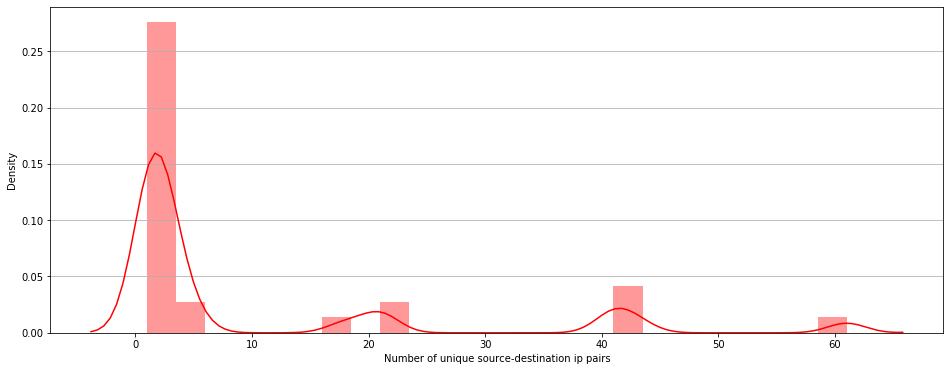

In [29]:
plt.figure(figsize=(16, 6))
sns.distplot(anomalous_time_diff["count"], color='r')
plt.xlabel("Number of unique source-destination ip pairs")
plt.ylabel("Density")
plt.grid(axis='y')

### Average time difference per anomalous source - destination ip pairs distribution

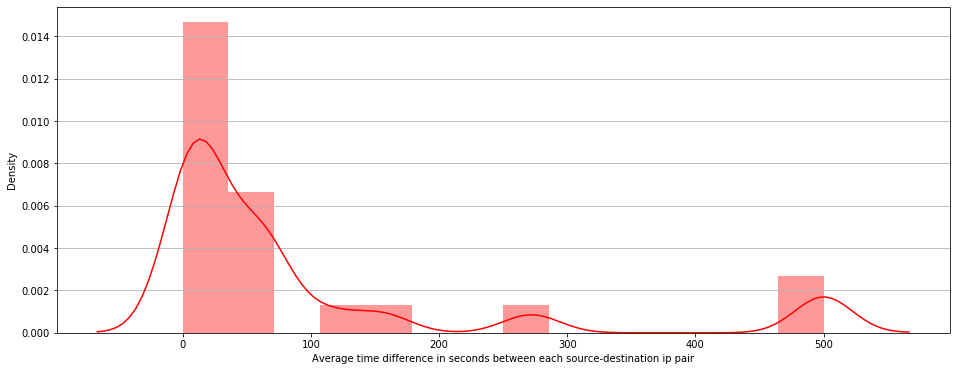

In [39]:
plt.figure(figsize=(16, 6))
sns.distplot(anomalous_time_diff["avg_time_diff"].astype('timedelta64[s]').dropna(), color='r')
plt.xlabel("Average time difference in seconds between each source-destination ip pair")
plt.ylabel("Density")
plt.grid(axis='y')

### Normal Flows

In [7]:
normal[continuous_features].describe()

,duration,protocol_num,flags_num,tos,packets,bytes,src_port,dst_port
count,28189.000000,28189.000000,28189.000000,28189.0,28189.000000,2.818900e+04,28189.000000,28189.000000
mean,0.752934,0.952996,4.348895,0.0,13.417432,8.258681e+03,33394.116677,4588.356841
std,1.493815,0.211651,4.537311,0.0,79.753330,9.386269e+04,23504.019196,13396.549048
min,0.000000,0.000000,0.000000,0.0,1.000000,6.000000e+01,53.000000,0.000000
25%,0.000000,1.000000,1.000000,0.0,1.000000,6.600000e+01,3128.000000,80.000000
50%,0.021000,1.000000,2.000000,0.0,2.000000,2.890000e+02,43654.000000,443.000000
75%,0.382000,1.000000,7.000000,0.0,7.000000,2.094000e+03,52608.000000,993.000000
max,4.999000,1.000000,42.000000,0.0,6903.000000,1.044191e+07,65370.000000,65096.000000


### Create a dataframe with the average time difference between flows for each normal source ip 

In [8]:
normal_time_diff_only_sources = normal.groupby(['src_ip'])['date'].agg({'count': 'count', 'avg_time_diff': lambda group: group.sort_values().diff().mean()})

### Number of distinct normal source ips with more than 1000 flows in the dataset

In [19]:
normal_time_diff_only_sources[normal_time_diff_only_sources['count'] > 1000].shape[0]

6

### Create a dataframe with the average time differences between flows for each source ip - destination ip normal pair

In [10]:
normal_time_diff = normal.groupby(['src_ip', 'dst_ip'])['date'].agg({'count': 'count', 'avg_time_diff': lambda group: group.sort_values().diff().mean()})

In [11]:
normal_time_diff

,,count,avg_time_diff
src_ip,dst_ip,,
119.63.196.87,147.32.87.36,2,00:00:00
121.54.13.22,147.32.87.36,9,00:00:03.767750
135.245.168.33,147.32.87.36,27,00:00:39.450923
136.182.2.26,147.32.87.36,6,00:01:26.260800
146.232.0.13,147.32.87.36,4,00:00:06.802333
...,...,...,...
91.121.70.32,147.32.87.36,32,00:00:00.419354
91.189.94.12,147.32.84.134,12,00:00:01.420909
92.62.230.210,147.32.87.36,10,00:00:00.005111


### Unique normal source - destination ip pairs distribution

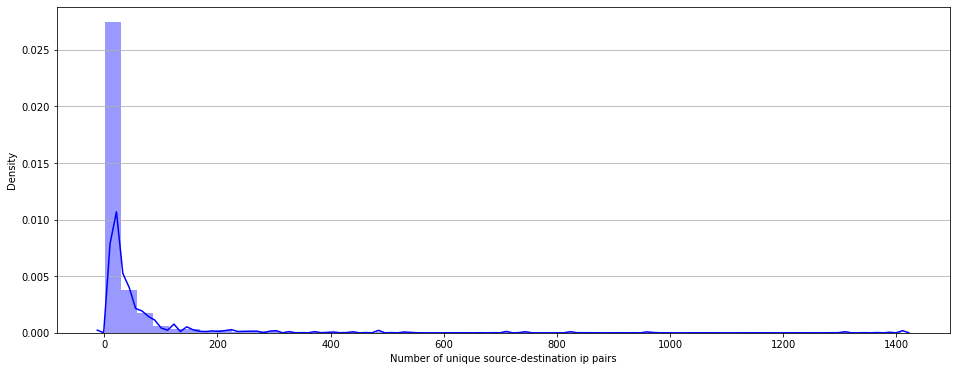

In [27]:
plt.figure(figsize=(16, 6))
sns.distplot(normal_time_diff["count"], color='b')
plt.xlabel("Number of unique source-destination ip pairs")
plt.ylabel("Density")
plt.grid(axis='y')

### Average time difference per normal source - destination ip pairs distribution

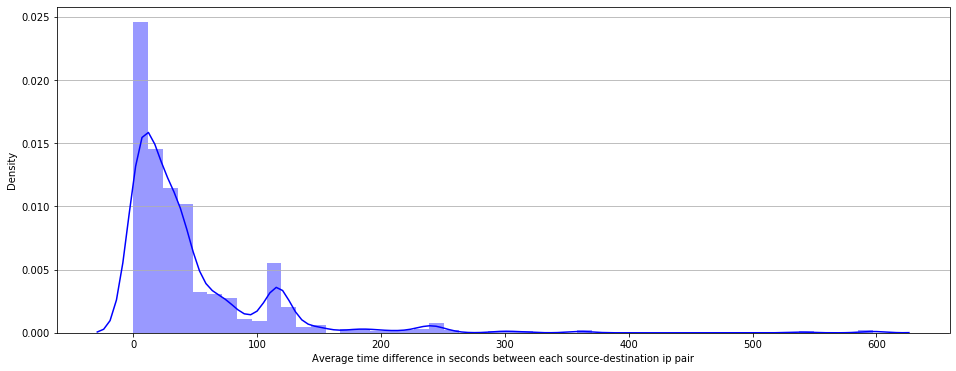

In [37]:
plt.figure(figsize=(16, 6))
sns.distplot(normal_time_diff["avg_time_diff"].astype('timedelta64[s]').dropna(), color='b')
plt.xlabel("Average time difference in seconds between each source-destination ip pair")
plt.ylabel("Density")
plt.grid(axis='y')

### Background Flows

In [8]:
background[continuous_features].describe()

,duration,protocol_num,flags_num,tos,packets,bytes,src_port,dst_port
count,419948.000000,419948.000000,419948.000000,419948.000000,419948.000000,4.199480e+05,419948.000000,419948.000000
mean,0.730623,0.330469,1.324497,0.022281,16.812620,1.388931e+04,24199.920688,24688.833925
std,1.431491,0.489504,3.333278,2.010220,381.727277,4.885253e+05,22377.326187,22459.938530
min,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000e+01,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,7.700000e+01,2764.000000,2619.500000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,1.340000e+02,13363.000000,13363.000000
75%,0.536000,1.000000,1.000000,0.000000,5.000000,5.650000e+02,49543.000000,49826.000000
max,5.138000,6.000000,44.000000,192.000000,41160.000000,6.156984e+07,65535.000000,65535.000000


### Create a dataframe with the average time difference between flows for each background source ip 

In [17]:
background_time_diff_only_sources = background.groupby(['src_ip'])['date'].agg({'count': 'count', 'avg_time_diff': lambda group: group.sort_values().diff().mean()})

### Number of distinct background source ips with more than 1000 flows in the dataset

In [20]:
background_time_diff_only_sources[background_time_diff_only_sources['count'] > 1000].shape[0]

23

### Create a dataframe with the average time differences between flows for each source ip - destination ip background pair

In [23]:
background_time_diff = background.groupby(['src_ip', 'dst_ip'])['date'].agg({'count': 'count', 'avg_time_diff': lambda group: group.sort_values().diff().mean()})

In [26]:
background_time_diff.head()

,,count,avg_time_diff
src_ip,dst_ip,,
0.0.0.0,255.255.255.255,102,00:00:12.572722
1.112.136.153,147.32.84.229,1,NaT
1.112.14.246,147.32.84.229,1,NaT
1.112.94.89,147.32.84.229,1,NaT
1.113.55.185,147.32.84.229,1,NaT


### Unique background source - destination ip pairs distribution

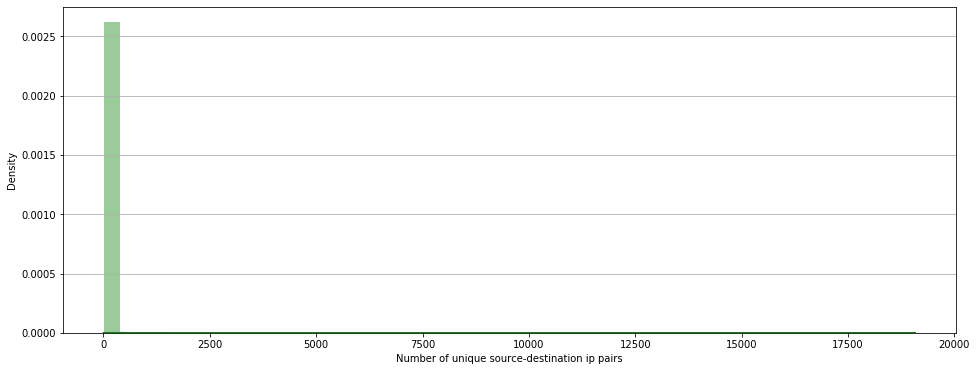

In [28]:
plt.figure(figsize=(16, 6))
sns.distplot(background_time_diff["count"], color='g')
plt.xlabel("Number of unique source-destination ip pairs")
plt.ylabel("Density")
plt.grid(axis='y')

### Average time difference per background source - destination ip pairs distribution

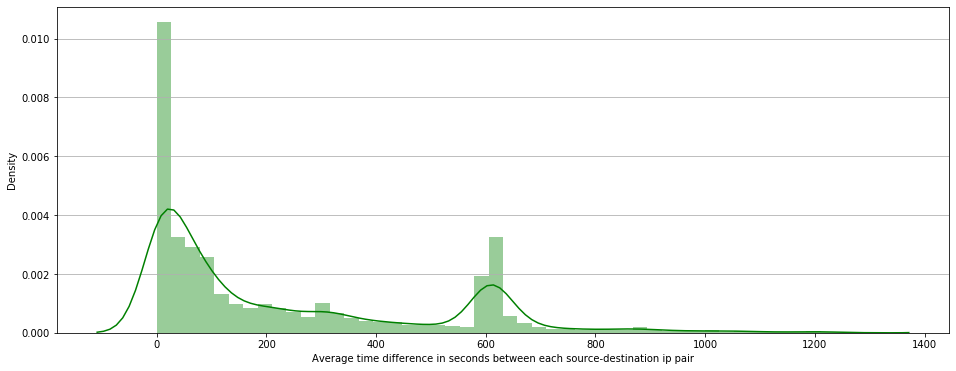

In [35]:
plt.figure(figsize=(16, 6))
sns.distplot(background_time_diff["avg_time_diff"].astype('timedelta64[s]').dropna(), color='g')
plt.xlabel("Average time difference in seconds between each source-destination ip pair")
plt.ylabel("Density")
plt.grid(axis='y')

## Let's plot!!!

In [10]:
plot_data = pd.concat([anomalous, normal, background], ignore_index=True)
plot_data_no_background = pd.concat([anomalous, normal], ignore_index=True)

## Barplot - Protocol Percentage

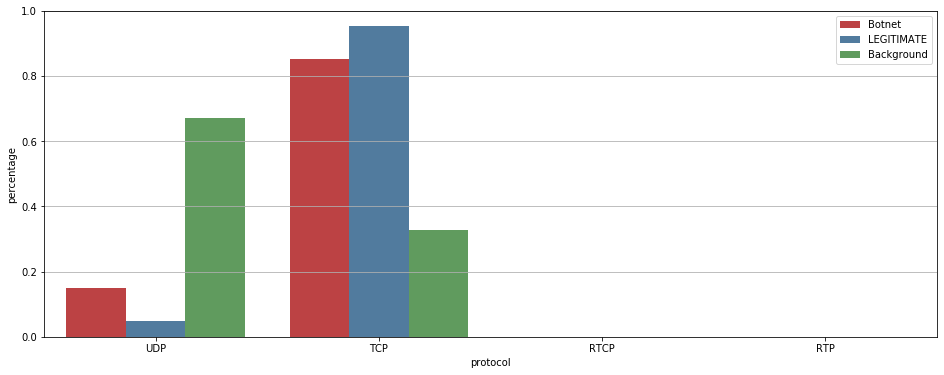

In [11]:
plt.figure(figsize=(16, 6))
plot_data["protocol"].groupby(plot_data["label"]).value_counts(normalize=True).rename("percentage").reset_index().pipe((sns.barplot, "data"), x="protocol", y="percentage", hue="label", hue_order=["Botnet", "LEGITIMATE", "Background"], palette=sns.color_palette("Set1", n_colors=8, desat=.8))
plt.legend(loc=1)
plt.grid(axis='y')

## Barplot - Packets vs Protocol

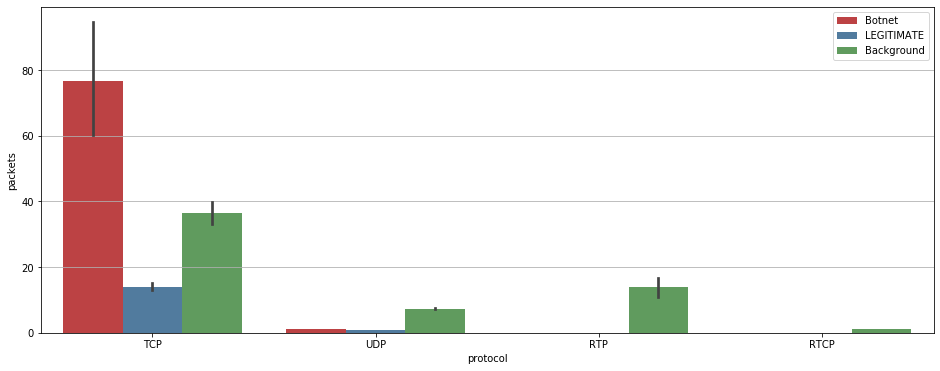

In [12]:
plt.figure(figsize=(16, 6))
sns.barplot(x="protocol", y="packets", hue="label", data=plot_data, palette=sns.color_palette("Set1", n_colors=8, desat=.8))
plt.legend(loc=1)
plt.grid(axis='y')

## Barplot - Bytes vs Protocol

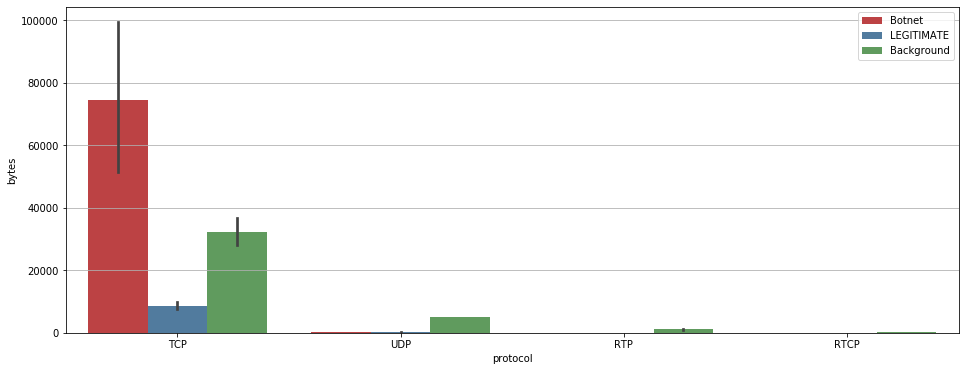

In [13]:
plt.figure(figsize=(16, 6))
sns.barplot(x="protocol", y="bytes", hue="label", data=plot_data, palette=sns.color_palette("Set1", n_colors=8, desat=.8))
plt.legend(loc=1)
plt.grid(axis='y')

## Boxplot - Packets vs Protocol

### With outliers

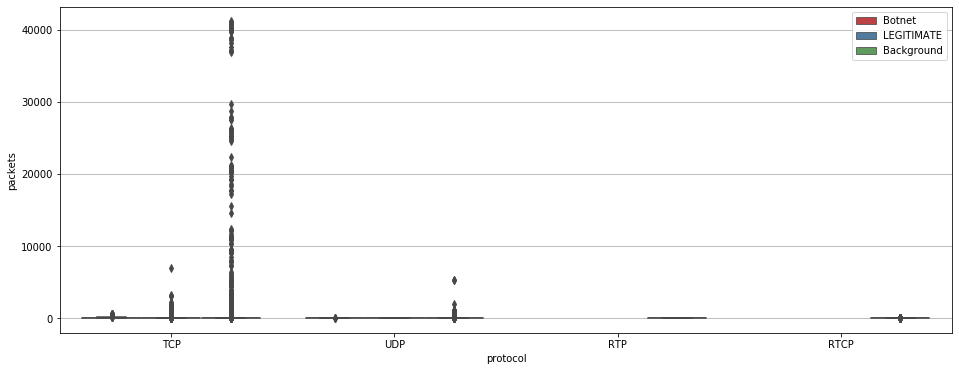

In [14]:
plt.figure(figsize=(16, 6))
sns.boxplot(x="protocol", y="packets", hue="label", data=plot_data, palette=sns.color_palette("Set1", n_colors=8, desat=.8))
plt.legend(loc=1)
plt.grid(axis='y')

### Without outliers

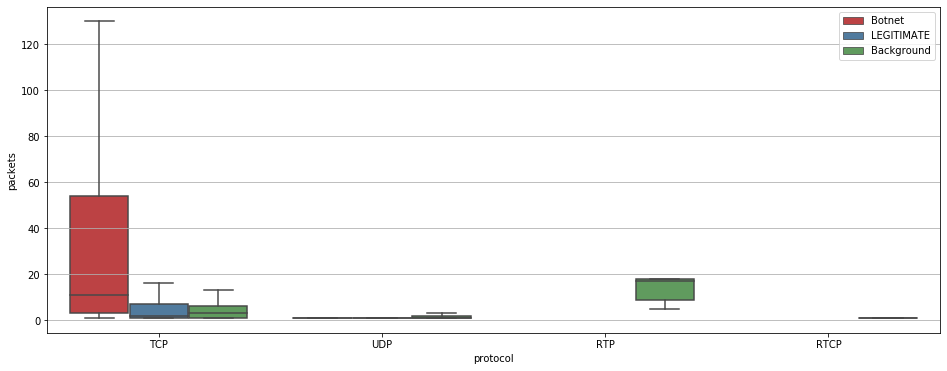

In [15]:
plt.figure(figsize=(16, 6))
sns.boxplot(x="protocol", y="packets", hue="label", data=plot_data, palette=sns.color_palette("Set1", n_colors=8, desat=.8), showfliers = False)
plt.legend(loc=1)
plt.grid(axis='y')

## Boxplot - Bytes vs Protocol

### With outliers

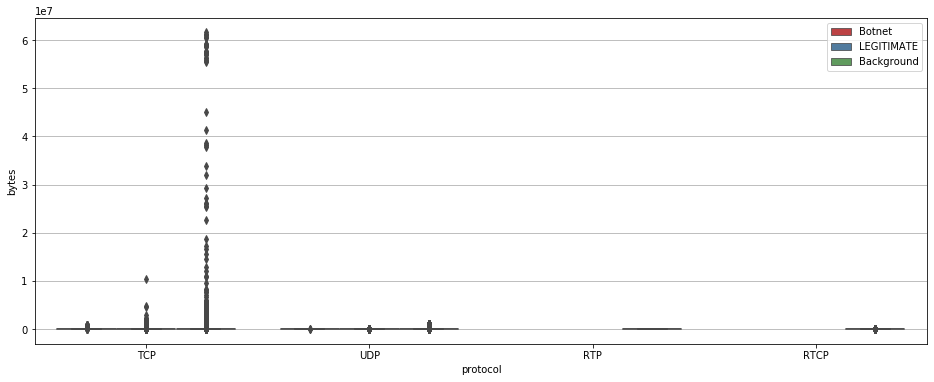

In [16]:
plt.figure(figsize=(16, 6))
sns.boxplot(x="protocol", y="bytes", hue="label", data=plot_data, palette=sns.color_palette("Set1", n_colors=8, desat=.8))
plt.legend(loc=1)
plt.grid(axis='y')

### Without outliers

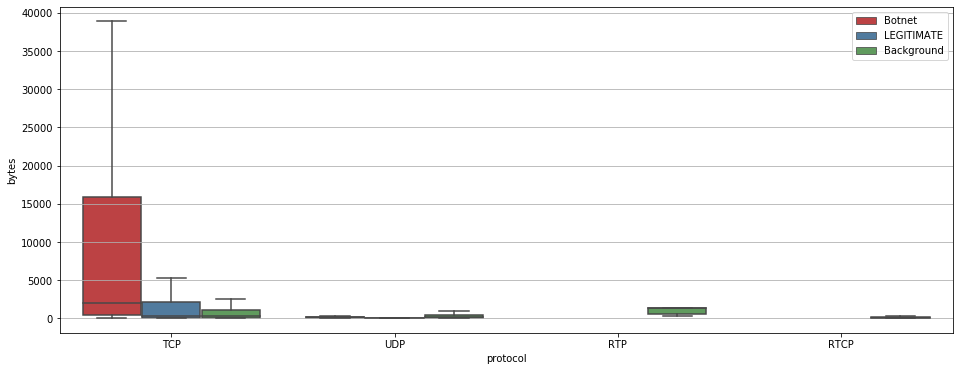

In [17]:
plt.figure(figsize=(16, 6))
sns.boxplot(x="protocol", y="bytes", hue="label", data=plot_data, palette=sns.color_palette("Set1", n_colors=8, desat=.8), showfliers = False)
plt.legend(loc=1)
plt.grid(axis='y')

## Histogram - Duration

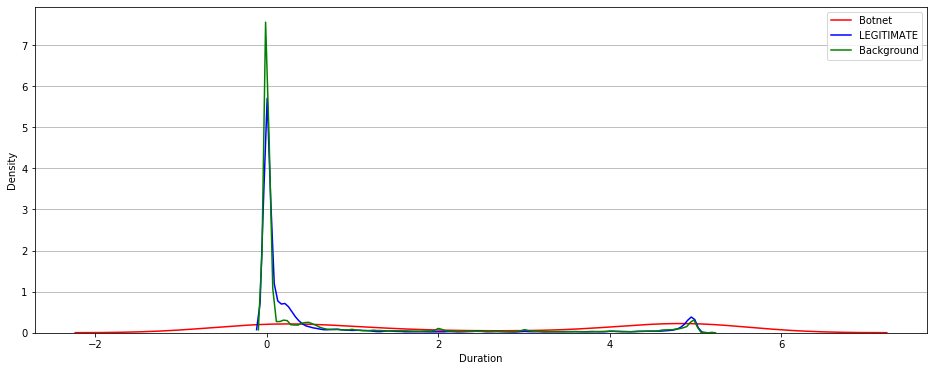

In [18]:
plt.figure(figsize=(16, 6))
sns.kdeplot(anomalous["duration"], label="Botnet", color='r')
sns.kdeplot(normal["duration"], label="LEGITIMATE", color='b')
sns.kdeplot(background["duration"], label="Background", color='g')
plt.xlabel("Duration")
plt.ylabel("Density")
plt.legend(loc=1)
plt.grid(axis='y')

### Anomalous Duration Histogram

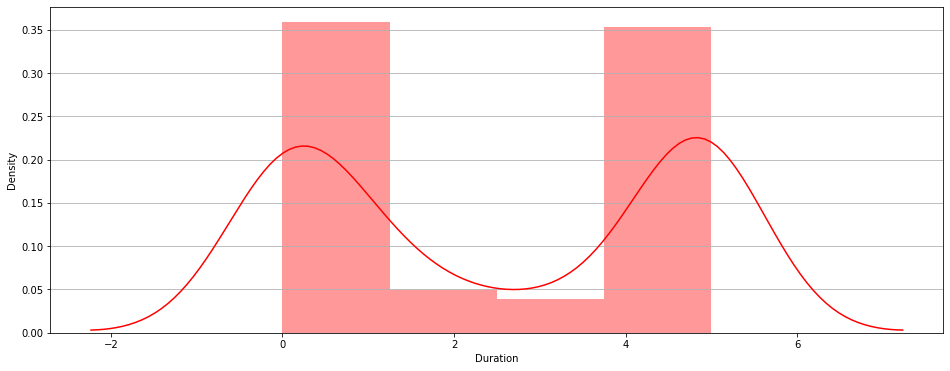

In [36]:
plt.figure(figsize=(16, 6))
sns.distplot(anomalous["duration"], color='r')
plt.xlabel("Duration")
plt.ylabel("Density")
plt.grid(axis='y')

### Normal Duration Histogram

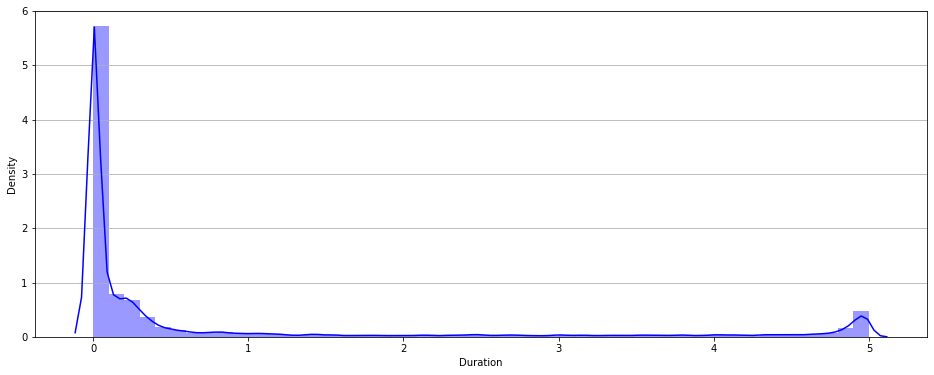

In [32]:
plt.figure(figsize=(16, 6))
sns.distplot(normal["duration"], color='b')
plt.xlabel("Duration")
plt.ylabel("Density")
plt.grid(axis='y')

### Background Duration Histogram

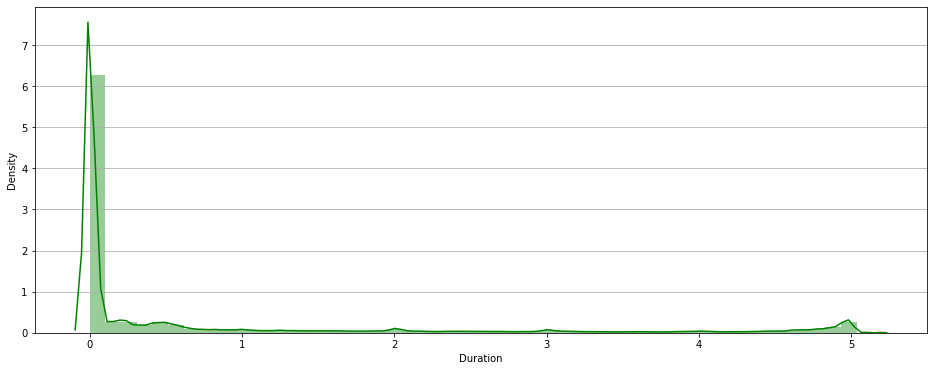

In [37]:
plt.figure(figsize=(16, 6))
sns.distplot(background["duration"], color='g')
plt.xlabel("Duration")
plt.ylabel("Density")
plt.grid(axis='y')

## Histogram - Source Ports

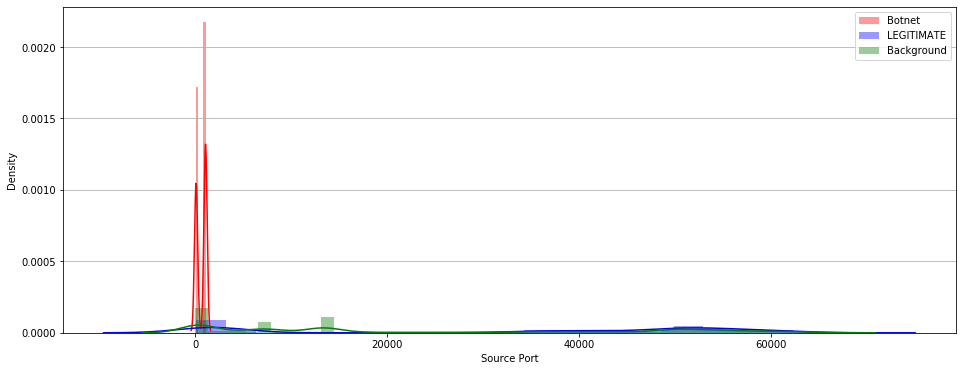

In [25]:
plt.figure(figsize=(16, 6))
sns.distplot(anomalous["src_port"], label="Botnet", color='r')
sns.distplot(normal["src_port"], label="LEGITIMATE", color='b')
sns.distplot(background["src_port"], label="Background", color='g')
plt.xlabel("Source Port")
plt.ylabel("Density")
plt.legend(loc=1)
plt.grid(axis='y')

### Anomalous Source Port Histogram

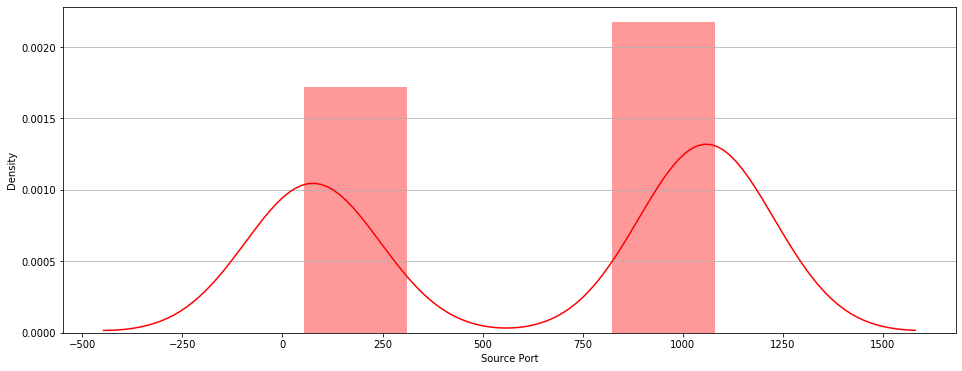

In [61]:
plt.figure(figsize=(16, 6))
sns.distplot(anomalous["src_port"], color='r')
plt.xlabel("Source Port")
plt.ylabel("Density")
plt.grid(axis='y')

### Normal Source Port Histogram

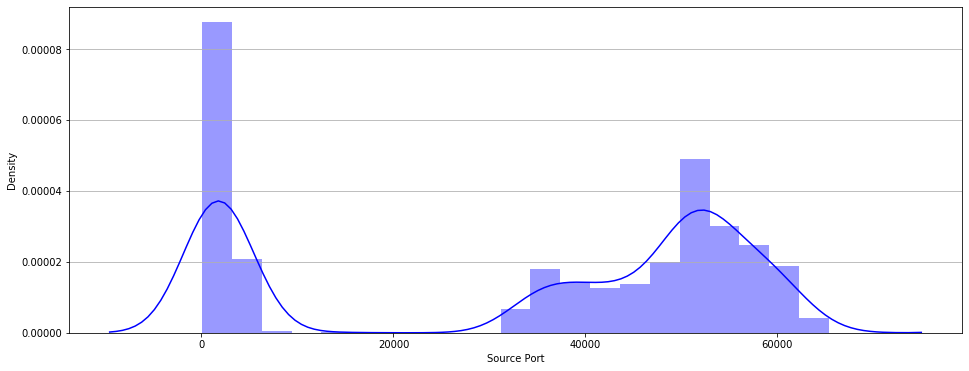

In [39]:
plt.figure(figsize=(16, 6))
sns.distplot(normal["src_port"], color='b')
plt.xlabel("Source Port")
plt.ylabel("Density")
plt.grid(axis='y')

### Background Source Port Histogram

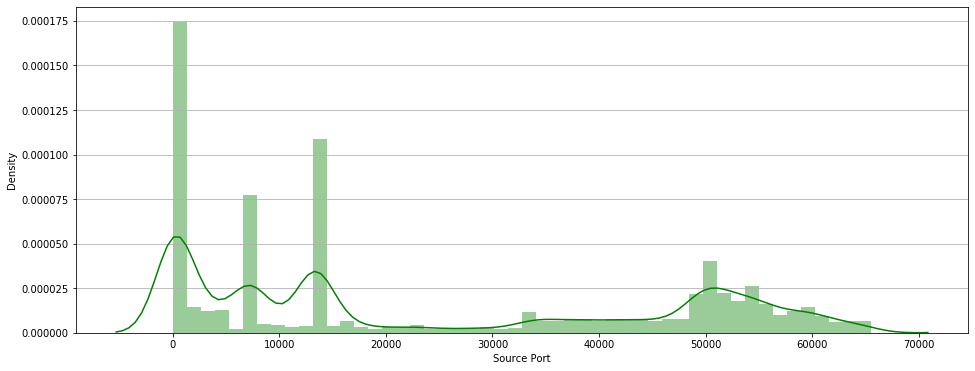

In [63]:
plt.figure(figsize=(16, 6))
sns.distplot(background["src_port"], color='g')
plt.xlabel("Source Port")
plt.ylabel("Density")
plt.grid(axis='y')

## Histogram - Destination Ports

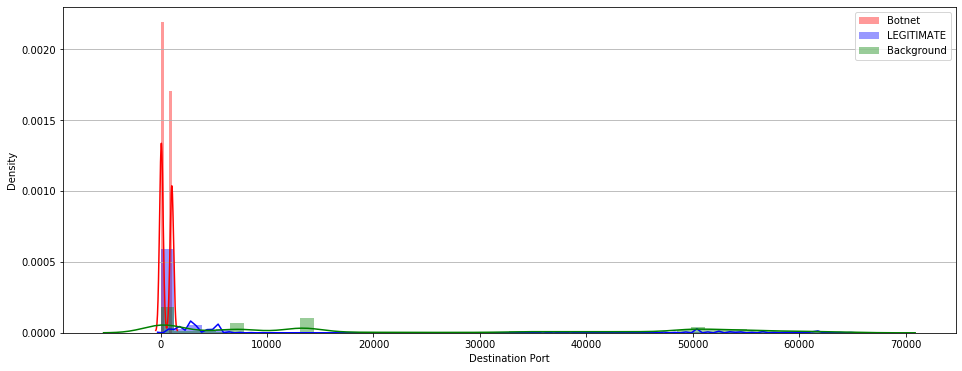

In [24]:
plt.figure(figsize=(16, 6))
sns.distplot(anomalous["dst_port"], label="Botnet", color='r')
sns.distplot(normal["dst_port"], label="LEGITIMATE", color='b')
sns.distplot(background["dst_port"], label="Background", color='g')
plt.xlabel("Destination Port")
plt.ylabel("Density")
plt.legend(loc=1)
plt.grid(axis='y')

### Anomalous Destination Port Histogram

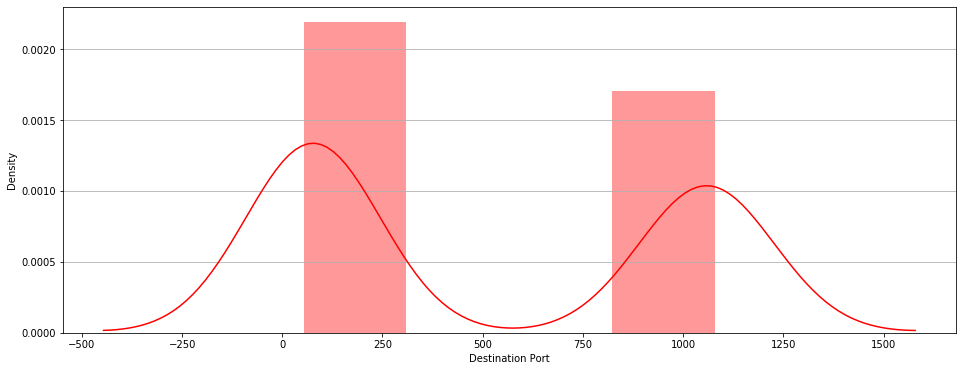

In [45]:
plt.figure(figsize=(16, 6))
sns.distplot(anomalous["dst_port"], color='r')
plt.xlabel("Destination Port")
plt.ylabel("Density")
plt.grid(axis='y')

### Normal Destination Port Histogram

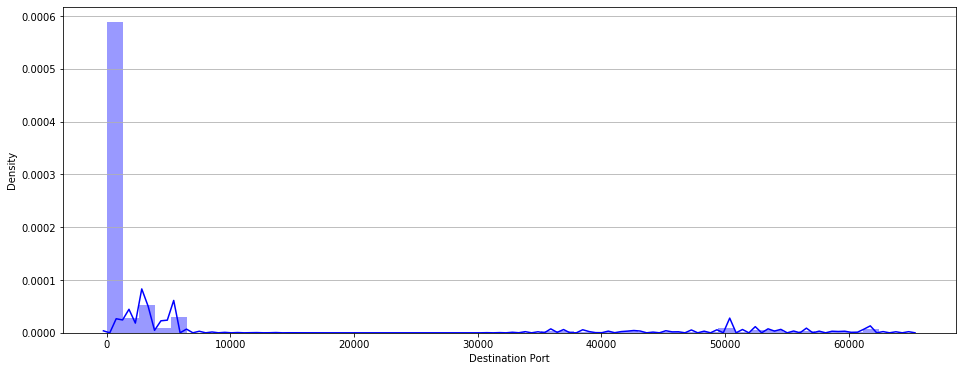

In [46]:
plt.figure(figsize=(16, 6))
sns.distplot(normal["dst_port"], color='b')
plt.xlabel("Destination Port")
plt.ylabel("Density")
plt.grid(axis='y')

### Background Destination Port Histogram

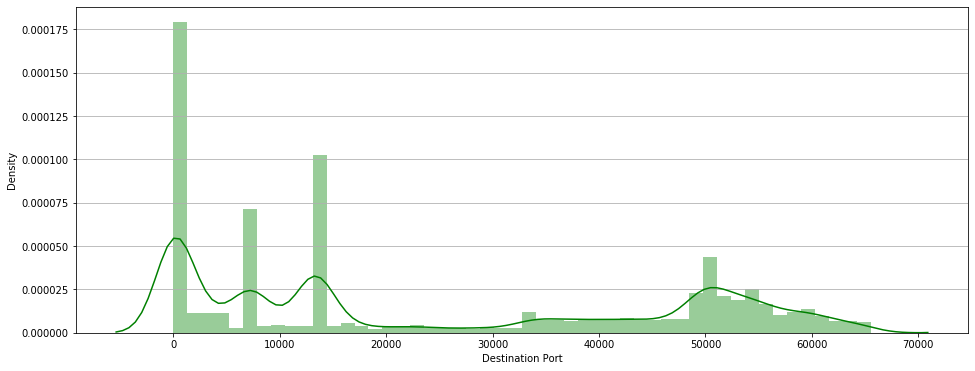

In [48]:
plt.figure(figsize=(16, 6))
sns.distplot(background["dst_port"], color='g')
plt.xlabel("Destination Port")
plt.ylabel("Density")
plt.grid(axis='y')

## Histogram - Packets

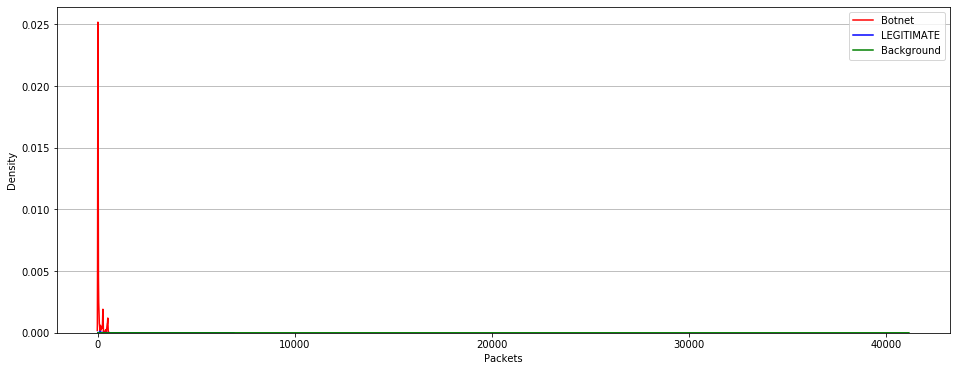

In [29]:
plt.figure(figsize=(16, 6))
sns.kdeplot(anomalous["packets"], label="Botnet", color='r')
sns.kdeplot(normal["packets"], label="LEGITIMATE", color='b')
sns.kdeplot(background["packets"], label="Background", color='g')
plt.xlabel("Packets")
plt.ylabel("Density")
plt.legend(loc=1)
plt.grid(axis='y')

### Anomalous Packets Histogram

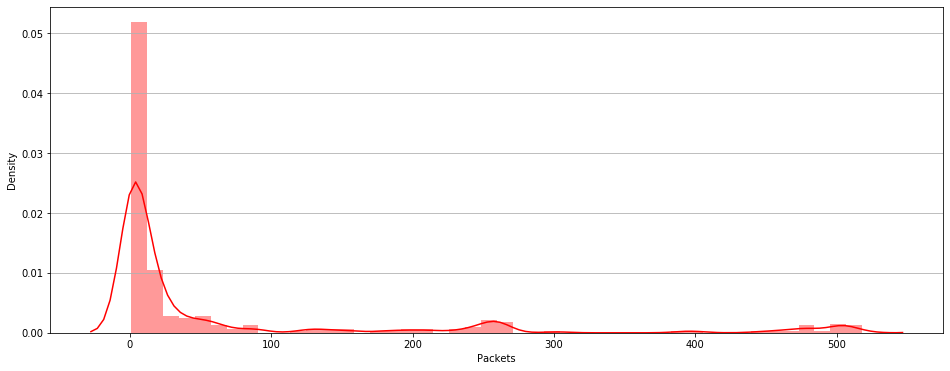

In [50]:
plt.figure(figsize=(16, 6))
sns.distplot(anomalous["packets"], color='r')
plt.xlabel("Packets")
plt.ylabel("Density")
plt.grid(axis='y')

### Normal Packets Histogram

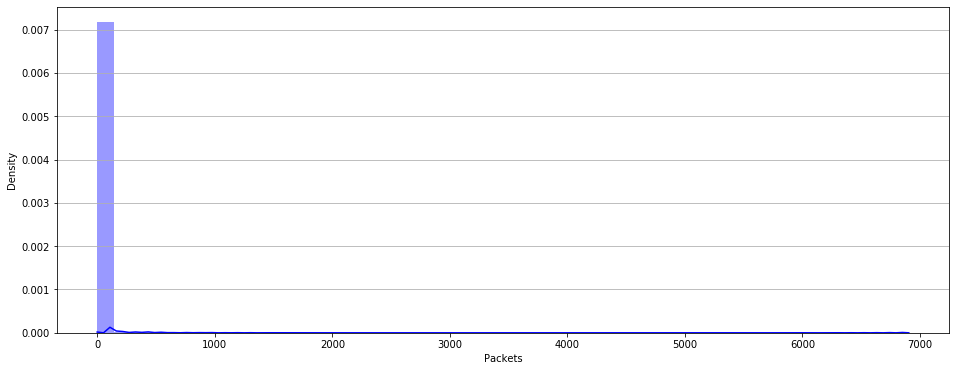

In [51]:
plt.figure(figsize=(16, 6))
sns.distplot(normal["packets"], color='b')
plt.xlabel("Packets")
plt.ylabel("Density")
plt.grid(axis='y')

### Background Packets Histogram

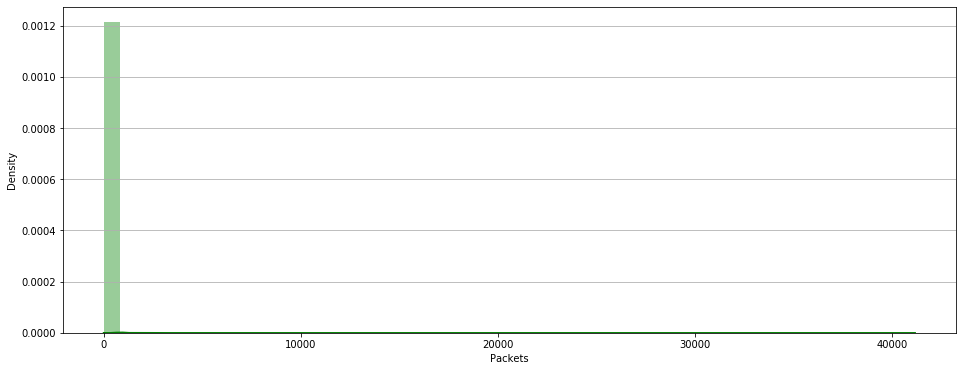

In [52]:
plt.figure(figsize=(16, 6))
sns.distplot(background["packets"], color='g')
plt.xlabel("Packets")
plt.ylabel("Density")
plt.grid(axis='y')

## Histogram - Bytes

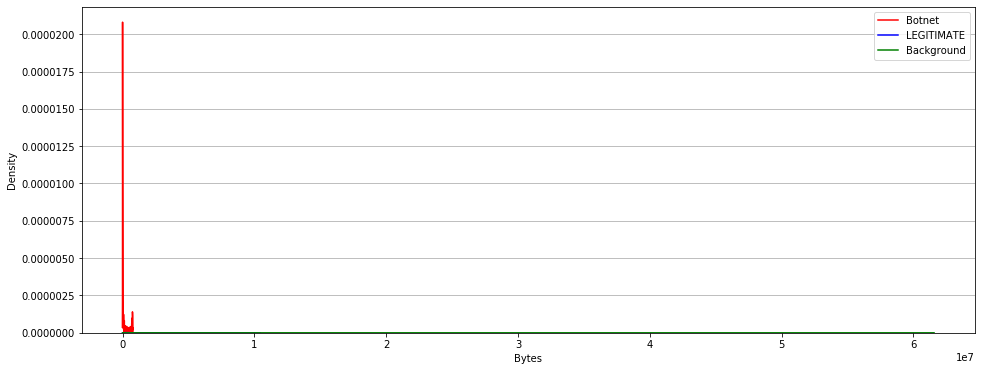

In [28]:
plt.figure(figsize=(16, 6))
sns.kdeplot(anomalous["bytes"], label="Botnet", color='r')
sns.kdeplot(normal["bytes"], label="LEGITIMATE", color='b')
sns.kdeplot(background["bytes"], label="Background", color='g')
plt.xlabel("Bytes")
plt.ylabel("Density")
plt.legend(loc=1)
plt.grid(axis='y')

### Anomalous Bytes Histogram

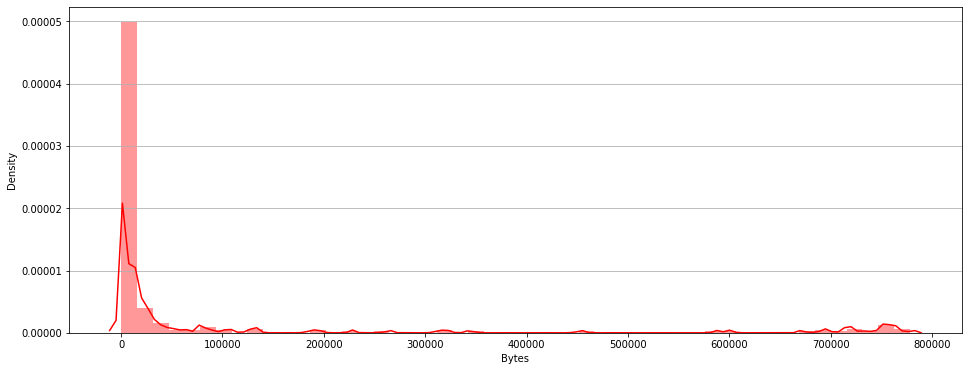

In [55]:
plt.figure(figsize=(16, 6))
sns.distplot(anomalous["bytes"], color='r')
plt.xlabel("Bytes")
plt.ylabel("Density")
plt.grid(axis='y')

### Normal Bytes Histogram

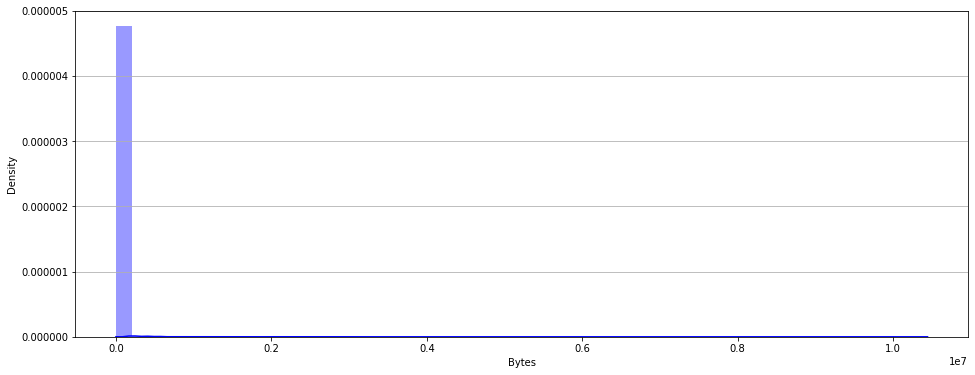

In [56]:
plt.figure(figsize=(16, 6))
sns.distplot(normal["bytes"], color='b')
plt.xlabel("Bytes")
plt.ylabel("Density")
plt.grid(axis='y')

### Background Bytes Histogram

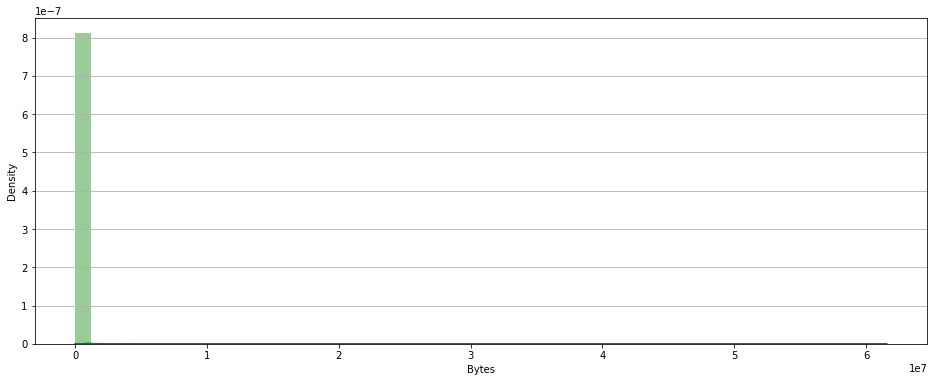

In [57]:
plt.figure(figsize=(16, 6))
sns.distplot(background["bytes"], color='g')
plt.xlabel("Bytes")
plt.ylabel("Density")
plt.grid(axis='y')

## Pairgrid for different promising flow features

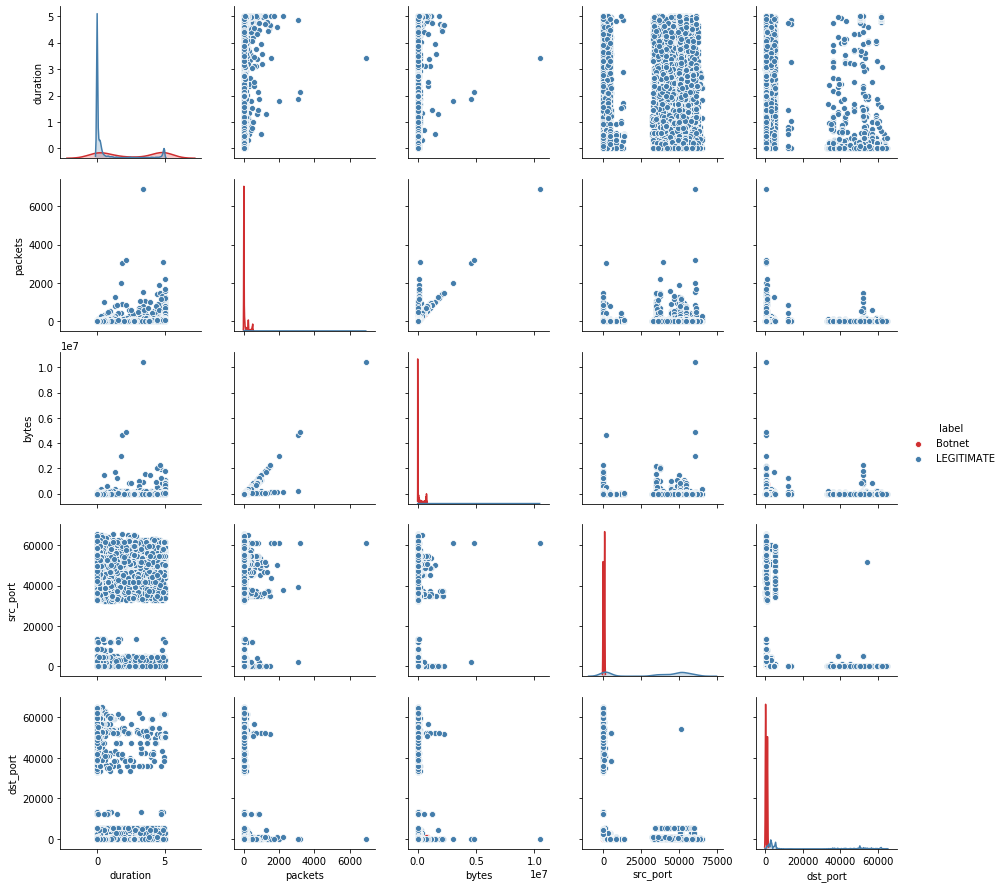

In [69]:
# makes sense only with balanced data
sns.pairplot(plot_data_no_background[['duration', 'packets', 'bytes', 'src_port', 'dst_port', 'label']], hue="label", palette=sns.color_palette("Set1", n_colors=8, desat=.8))